In [1]:
#Allows pipeline to work with videos

#Importing packages required for video processing
from moviepy.editor import VideoFileClip
from IPython.display import HTML
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2 
%matplotlib inline

def process_image(image):
   
    #Converts image to gray and plots it
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    plt.imshow(gray, cmap='gray')
    
    #Defines lower and upper treshold for Canny function
    lower_treshold = 40
    higher_treshold = 110

    #Defines kernel size for Gaussian smoothing 
    kernel_size = 5
    blur_gray = cv2.GaussianBlur(gray,(kernel_size,kernel_size), 0)

    #Finds edges with Canny Edge Detection
    edges = cv2.Canny(blur_gray, lower_treshold, higher_treshold)
    

    #Create a polyfill filter

    mask = np.zeros_like(edges)
    ignore_mask_color = 255

    #Defining four sided polygon to mask
    imshape = image.shape
    vertices = np.array([[(126,imshape[0]),(452, 320), (500,320), (imshape[1],imshape[0])]], dtype=np.int32)
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    masked_edges = cv2.bitwise_and(edges, mask)
    
    #Define Hough Transform Parameters
    rho = 2
    theta = np.pi/180
    threshold = 19
    min_line_length = 38
    max_line_gap = 15
    line_image = np.copy(image)*0

    #Runs Hough Transform
    lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)
 

   #Seperates array into left array and right array

    left = np.empty((0,4),int)
    right = np.empty((0,4),int)

    for seperate in lines:
        for x1,y1,x2,y2 in seperate:
            if x2 <= 474:
                left = np.vstack([left,[x1,y1,x2,y2]])
            elif x2 >= 475:
                right = np.vstack([right,[x1,y1,x2,y2]])
            else:
                continue
            
    # Finds slope of all lines
    m_left = np.empty((0,1),int)
    m_right = np.empty((0,1),int)
    for grad in left:
        l = (grad[3]-grad[1])/(grad[2]-grad[0])
        m_left = np.vstack([m_left,[l]])
    
    for grad in right:
        r = (grad[3]-grad[1])/(grad[2]-grad[0])
        m_right = np.vstack([m_right,[r]])

    #Finds left y-intercept
    x_left=np.mean(left[:,0:1])
    y_left=np.mean(left[:,1:2])
    m_ave_left = np.mean(m_left)
    b_left = y_left - m_ave_left*x_left
  
    #Finds right y-intercept
    x_right=np.mean(right[:,0:1])
    y_right=np.mean(right[:,1:2])
    m_ave_right = np.mean(m_right)
    b_right = y_right - m_ave_right*x_right
  
    if left.size != 0:
    #Draws left line on line_image
        x1_left_arr = (540-b_left)/(m_ave_left)
        x1_left_scalar = int(np.asscalar(x1_left_arr))
        
        #y2_left_min = np.amin(left[:,1:2])
        #y2_left_scalar = int(np.asscalar(y2_left_min))
        x2_left_arr = (320-b_left)/(m_ave_left)
        x2_left_scalar = int(np.asscalar(x2_left_arr))

        cv2.line(line_image,(x1_left_scalar,545),(x2_left_scalar,320),(255,0,0),12)
        
    if right.size != 0:
        #Draws right line on test_image
        x1_right_arr = (540-b_right)/(m_ave_right)
        x1_right_scalar = int(np.asscalar(x1_right_arr))

        #y2_right_min = np.amin(right[:,1:2])
        #y2_right_scalar = int(np.asscalar(y2_right_min))
        x2_right_arr = (320-b_right)/(m_ave_right)
        x2_right_scalar = int(np.asscalar(x2_right_arr))


        cv2.line(line_image,(x1_right_scalar,545),(x2_right_scalar,320),(255,0,0),12)
    
    #Combining images
    color_edges = np.dstack((edges,edges,edges))

    #Draw lines on image
    lines_edges = cv2.addWeighted(image,0.8,line_image,1,0)
    
    
    return lines_edges

[MoviePy] >>>> Building video white.mp4
[MoviePy] Writing video white.mp4


100%|███████████████████████████████████████████████████████████████████████████████▋| 221/222 [00:05<00:00, 38.68it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: white.mp4 

Wall time: 6.44 s


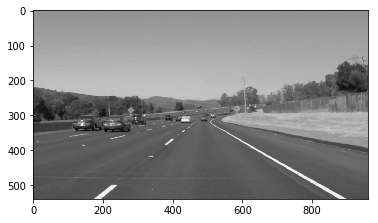

In [2]:
white_output = 'white.mp4'
clip1 = VideoFileClip("solidWhiteRight.mp4")
white_clip = clip1.fl_image(process_image) 
%time white_clip.write_videofile(white_output, audio=False)

HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

[MoviePy] >>>> Building video yellow.mp4
[MoviePy] Writing video yellow.mp4


100%|███████████████████████████████████████████████████████████████████████████████▉| 681/682 [00:19<00:00, 35.81it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: yellow.mp4 

Wall time: 20.6 s


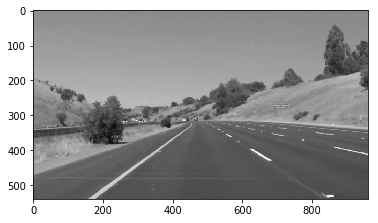

In [3]:
yellow_output = 'yellow.mp4'
clip2 = VideoFileClip('solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(process_image)
%time yellow_clip.write_videofile(yellow_output, audio=False)

HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))